### SVM
#### iris 분류

In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve

In [2]:
iris=load_iris()

In [6]:
x_data=iris.data[:,:2]
y_data=iris.target

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data
                                               ,train_size=0.7,test_size=0.3,
                                              random_state=102)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(105, 2) (45, 2) (105,) (45,)


In [9]:
cif=svm.SVC(kernel='linear')
cif.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred=cif.predict(x_test)

In [11]:
cfmat=confusion_matrix(y_test,y_pred)
print(cfmat)

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]


In [12]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8


- #### linear

In [13]:
cif_lin=svm.LinearSVC()
cif_lin.fit(x_train,y_train)
y_pred_lin=cif_lin.predict(x_test)
print(confusion_matrix(y_test,y_pred_lin))
print(accuracy_score(y_test,y_pred_lin))

[[17  0  0]
 [ 0  7  5]
 [ 0  6 10]]
0.7555555555555555


C:\Users\chaeh\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


- #### radial basis function

In [14]:
cif_rbf=svm.SVC(kernel='rbf',gamma=0.5)
cif_rbf.fit(x_train,y_train)
y_pred_rbf=cif_rbf.predict(x_test)
print(confusion_matrix(y_test,y_pred_rbf))
print(accuracy_score(y_test,y_pred_rbf))

[[17  0  0]
 [ 0  9  3]
 [ 0  6 10]]
0.8


- #### polynomial kernel

In [15]:
cif_poly=svm.SVC(kernel='poly',degree=3)
cif_poly.fit(x_train,y_train)
y_pred_poly=cif_poly.predict(x_test)
print(confusion_matrix(y_test,y_pred_poly))
print(accuracy_score(y_test,y_pred_poly))

[[17  0  0]
 [ 0  9  3]
 [ 0  7  9]]
0.7777777777777778


- #### 시각화

In [16]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [18]:
models=(svm.SVC(kernel='linear'),
       svm.LinearSVC(),
       svm.SVC(kernel='rbf',gamma=0.5),
       svm.SVC(kernel='poly',degree=3))
models=(cif.fit(x_train,y_train) for cif in models)

In [20]:
titles=('linear','LinearSVC','rbf','poly')

C:\Users\chaeh\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


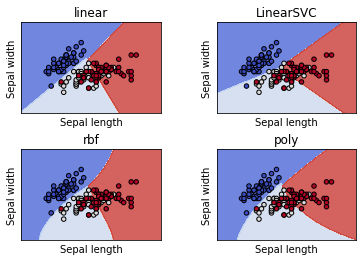

In [21]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = x_data[:, 0], x_data[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y_data, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()